# 구조파악

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('trip.csv')

print(df.shape)
df.head()


(22701, 9)


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


## 숫자형, 범주형 요약 통계 확인

In [2]:
print("Numeric summary stats")
print(df.describe())
print("Categorical summary stats")
print(df.describe(include="object"))

Numeric summary stats
       passenger_count  trip_distance   fare_amount    tip_amount  \
count     22701.000000   22701.000000  22698.000000  22701.000000   
mean          1.643584       2.913400     13.024009      1.835745   
std           1.304942       3.653023     13.240074      2.800537   
min           0.000000       0.000000   -120.000000      0.000000   
25%           1.000000       0.990000      6.500000      0.000000   
50%           1.000000       1.610000      9.500000      1.350000   
75%           2.000000       3.060000     14.500000      2.450000   
max          36.000000      33.960000    999.990000    200.000000   

       tolls_amount  
count  22701.000000  
mean       0.312514  
std        1.399153  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       19.100000  
Categorical summary stats
       passenger_name   tpep_pickup_datetime  tpep_dropoff_datetime  \
count           22701                  22701                 

# 결측치

## 결측치 개수확인

In [8]:
missing = df.isnull().sum().sort_values(ascending=False)    #결측치 개수 확인하기
print("Missing values per column")
print(missing)

Missing values per column
passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64


## 중앙값으로 결측치 채우기

In [9]:
before = df["fare_amount"].isnull().sum()       #컬럼에서 결측치 개수를 세어서 before에 저장
median_fare = df["fare_amount"].median()        #fare_amount의 중앙값을 계산해서 median_fare에 저장

print("Before missing fare_amount:", before)    #처리 전 결측치가 몇 개인지 확인
print("Median fare_amount used:", median_fare)  #어떤 값으로 채우는지(중앙값이 얼마인지) 확인

df["fare_amount"] = df["fare_amount"].fillna(median_fare)   #결측치(NaN)인 곳을 median_fare(중앙값) 값으로 채움

after = df["fare_amount"].isnull().sum()        #처리 후 결측치가 남아있는지 다시 계산
print("After missing fare_amount:", after)


Before missing fare_amount: 0
Median fare_amount used: 9.5
After missing fare_amount: 0


# 전처리

## 날짜 전처리
날짜 전처리를 하는 이유는 데이터파일 속 날짜가 문자열로 되어있기 때문

In [10]:
print("Before datetime conversion")     #변환 전 확인
print(df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].dtypes) #승차시간과 하차시간 두 컬럼의 타입 확인
df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].head()    #실제 값 확인

Before datetime conversion
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


,tpep_pickup_datetime,tpep_dropoff_datetime
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM


In [11]:
#문자열을 datetime 타입으로 변환한다.
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")

print(df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object


# Card 통합

In [12]:
print(df["payment_method"].value_counts())

payment_method
Cash           11196
Debit Card      5783
Credit Card     5722
Name: count, dtype: int64


In [13]:
df["payment_method"] = df["payment_method"].replace({
    "Credit Card": "Card",      #Credit Card와
    "Debit Card": "Card"        #Debit Card 의 이름을 모두 Card로 통일시킨다.
})

print(df["payment_method"].value_counts())

payment_method
Card    11505
Cash    11196
Name: count, dtype: int64


# 이상치

In [14]:
print("현재 데이터 갯수:", df.shape)

현재 데이터 갯수: (22701, 9)


In [15]:
print(df.columns)

Index(['passenger_name', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'payment_method', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount'],
      dtype='object')


## 이상치 제거
다른방법으로도 이상치 제거가 가능 하나 해당 데이터에서는 칼럼의 갯수가 적고, 이상치인 값을 확실히 구분할 수 있어 해당 방법으로 이상치를 제거함

In [ ]:
df = df[
    (df["passenger_count"] >= 1) &  #승객수가 1명 이상
    (df["trip_distance"] > 0) &     #이동거리가 0보다 높은 것(초과)
    (df["fare_amount"] > 0) &       #요금이 0원보다 높은 것(초과)
    (df['fare_amount'] < 210 ) &    #요금이 210 보다 낮은것 - 210미만으로 남긴것은 요금의 상위 5개를 출력했을 때 최대값 999 이후 200이 나와 999는 측정에 불필요하다 판단하여 제거   
    (df["trip_duration_min"] > 0) &   #이동시간이 0보다 높은 것(초과)
    (df["trip_duration_min"] < 150)   #이동시간이 150보다 낮은것 - 150미만으로 남긴것은 소수의 데이터들이 평균과 많이 떨어진 높은 값을 가지고 있어 제거
]                                   #위와같이 정상적인 기록들의 데이터만 남겨둔다.

print("이상치 제거 후 데이터 갯수:", df.shape)

이상치 제거 후 데이터 갯수: (22457, 10)


# 이동시간 변수 생성

In [19]:
df["trip_duration_min"] = (
    df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]    #하차시간 - 승차시간을 계산하는데
).dt.total_seconds() / 60                                       #초단위로 변환 후 /60 을 하여 분단위로 변환

print("trip_duration_min summary")
print(df["trip_duration_min"].describe())

trip_duration_min summary
count    22503.000000
mean        17.067704
std         61.564666
min          0.016667
25%          6.733333
50%         11.233333
75%         18.450000
max       1439.550000
Name: trip_duration_min, dtype: float64


# 시각화

C:\Users\lee\AppData\Local\Temp\ipykernel_36176\3249268566.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([card_tips, cash_tips], labels=["Card", "Cash"])


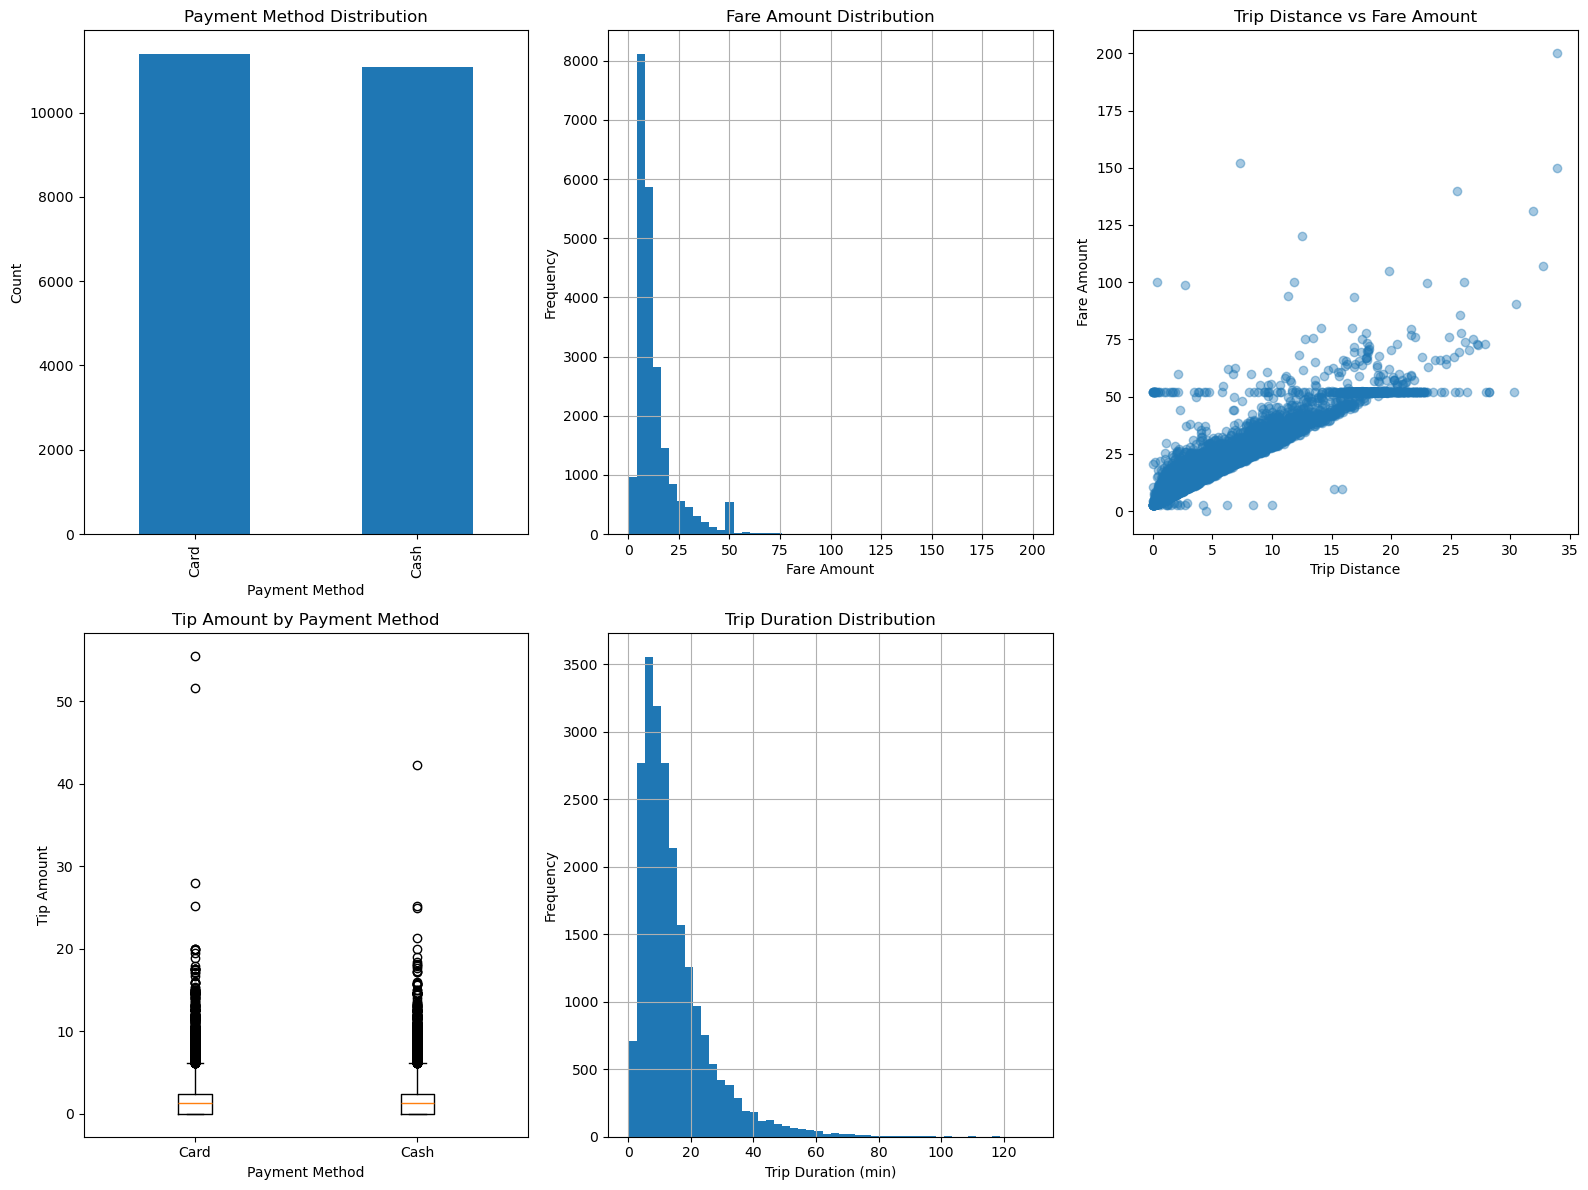

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
df["payment_method"].value_counts().plot(kind="bar")    #결제수단의 빈도(count)를 나타내는 그래프
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")

plt.subplot(2, 3, 2)
df["fare_amount"].hist(bins=50)                         #택시비의 분포를 확인하기 위한 그래프
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

plt.subplot(2, 3, 3)
plt.scatter(df["trip_distance"], df["fare_amount"], alpha=0.4)  #주행 거리에 따른 요금에 대한 산점도(Plot)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")

plt.subplot(2, 3, 4)
card_tips = df[df["payment_method"] == "Card"]["tip_amount"]    #결제수단에 따른 팁
cash_tips = df[df["payment_method"] == "Cash"]["tip_amount"]
plt.boxplot([card_tips, cash_tips], labels=["Card", "Cash"])
plt.title("Tip Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Tip Amount")

plt.subplot(2, 3, 5)
df["trip_duration_min"].hist(bins=50)       #운행거리 분포
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### 그래프 분석

1. 결제 수단의 차이
 - 결제 수단은 Card, Cash 둘 다 비슷한 정도로 나와 결제수단에 따라 달라질 것이 없어보인다.
2. 요금액 분포
 - 0 ~ 25달러치 요금의 손님들이 대부분이다.
3. 주행거리에 따른 요금
 - 주행거리에 따라 요금이 비싸진다. 다만 거리와 상관없이 52달러의 요금이 고정되어 있는 점들을 봐서는 거리상관없이 고정요금제가 있는듯 하다.
4. 결제수단에 따른 팁
 - 결제수단과 상관없이 보편적으로 팁은 0~20달러를 주는 경우가 많으며 특히나 0~15달러 구간이 매우 높다.
5. 운행시간 분포
 - 0~20분 사이에 치우쳐있고 시간이 늘어날수록 분포도가 적어진다. 대부분의 사람들이 이용하는 운행시간대는 10분 부근이다.


# 팁

## 주행거리에 따른 팁의 변화

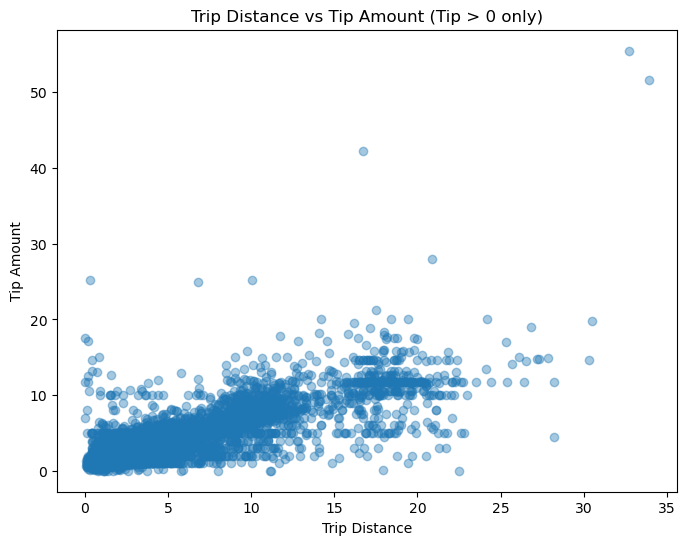

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 팁을 준 경우만 출력
df_tip = df[df["tip_amount"] > 0]
plt.scatter(df_tip["trip_distance"], df_tip["tip_amount"], alpha=0.4)

plt.title("Trip Distance vs Tip Amount (Tip > 0 only)")
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")

plt.show()

### 그래프 분석

주행 거리에 따라 팁이 늘어나긴 하지만 유의미할 정도로 큰 차이는 나타나지 않는다.

## 각 항목 별 팁 여부

In [ ]:
df["tip_given"] = (df["tip_amount"] > 0).astype(int)    #팁을 줬으면 1, 안줬으면 0으로 입력

print(df["tip_given"].value_counts())

corr_cols = [                   #각 변수 별 팁을 준 여부를 계산
    "trip_distance",
    "fare_amount",
    "trip_duration_min",
    "passenger_count",
    "tolls_amount"
]

corr_result = []        #계산한 값을 리스트로 저장

for col in corr_cols:   #각 변수들을 하나씩 꺼내어 계산 반복
    corr_value = df[col].corr(df["tip_given"])  #꺼낸 컬럼과 팁 여부의 상관계수 계산
    corr_result.append({     #계산한 결과를 리스트에 딕셔너리로 추가
        "feature": col,     #어떤 변수에 대한 결과인지 기록
        "correlation_with_tip_given": corr_value
    })

corr_df = pd.DataFrame(corr_result).sort_values(    #계산하여 만든 리스트 속 값들을 DataFrame로 변환 후 정렬
    by="correlation_with_tip_given",    
    ascending=False #내림차순 정렬
)

print(corr_df)

tip_given
1    14551
0     7906
Name: count, dtype: int64
             feature  correlation_with_tip_given
4       tolls_amount                    0.040985
0      trip_distance                    0.039625
2  trip_duration_min                    0.037474
1        fare_amount                    0.036258
3    passenger_count                   -0.023923


### 결과값 분석

상관계수가 대부분 0.04 이하이기 때문에 팁을 받는것은 다른 항목들의 영향이 적다.

# 고정요금 이용자의 평균 운행거리

In [ ]:
#운행요금이 52인 이용자만 필터링
fixed_fare_df = df[df["fare_amount"] == 52] 

print("Number of fixed-fare trips:", len(fixed_fare_df))

Number of fixed-fare trips: 495


In [ ]:
#필터링한 이용자들의 평균 운행거리 계산
avg_distance_fixed_fare = fixed_fare_df["trip_distance"].mean()
print("Average trip distance for $52 fixed fare:", avg_distance_fixed_fare)

Average trip distance for $52 fixed fare: 17.318868686868687


In [ ]:
#평균요금 계산
overall_avg_distance = df["trip_distance"].mean()

print("Overall average trip distance:", overall_avg_distance)
print("Fixed-fare average trip distance:", avg_distance_fixed_fare)

Overall average trip distance: 2.9295377833192324
Fixed-fare average trip distance: 17.318868686868687


## 고정요금 이용자와 비슷한 운행거리 이용자의 요금 비교

In [ ]:
#이용 요금이 52달러가 아닌 이용자만 필터링
non_fixed_df = df[df["fare_amount"] != 52]

In [54]:
#평균값이기 때문에 16.5~17.5로 비슷한 범위의 데이터를 필터링
distance_17_df = non_fixed_df[
    (non_fixed_df["trip_distance"] >= 16.8) &
    (non_fixed_df["trip_distance"] <= 17.8)
]
print("Number of non-fixed trips around 17 miles:", len(distance_17_df))

Number of non-fixed trips around 17 miles: 24


In [ ]:
#평균요금 계산
avg_fare_around_17 = distance_17_df["fare_amount"].mean()
print("Average fare for non-fixed trips around 17 miles:", avg_fare_around_17)

Average fare for non-fixed trips around 17 miles: 57.21875


In [55]:
#고정요금인 52와의 값 비교
print("Fixed fare:", 52)
print("Non-fixed average fare (17 miles):", avg_fare_around_17)

Fixed fare: 52
Non-fixed average fare (17 miles): 57.21875


### 결과값 분석

고정요금(52) 이용자의 평균 운행거리와 동일한 거리를 이용한 이용자들의 요금을 비교한 결과
일반 요금을 비슷한 거리를 운행했을 때 고정요금보다 요금이 높으므로 고정요금제는 손해다.